# Control Theory - 5th meeting
## Transfer functions

### Preliminaries: Furier Transform
Furier transform is defined as:
$$F(\omega) = \int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt$$
Note that $e^{ix}=cos(x)+i\ sin(y)$.

Intuition of a transform is that it allows to decompose a function to a sum of scaled sine/cosine functions.

For an in-depth explanation of the Furier transform I highly recommend 3blue1brown's video on the topic: https://www.youtube.com/watch?v=spUNpyF58BY

### Laplace Transform
Laplace transform can be defined as:
$$F(s) = \mathcal{L}\{f(t)\} = \int_0^{\infty}f(t)e^{-st}dt$$
Where $s$ is a complex variable that can be written as $s=\alpha+j\omega$.
Thus, we can rephrase the above equation as:
$$\mathcal{L}\{f(t)\} = \int_0^{\infty} f(t)e^{-(\alpha+j\omega)t}dt$$
$$\mathcal{L}\{f(t)\} = \int_0^{\infty} f(t)e^{-\alpha t}e^{-j\omega t}f(t)dt$$
which is a Fourier transform of an original function multiplied by $e^{-\alpha t}$

Note that for $\alpha=0$, the Laplace transform is the same as Fourier transform - Furier transform thus can be understood as a "slice" of a Laplace transform.

### Transfer function
Transfer function can be described as a ratio of Laplace transform of a system's output to Laplace transform of an input.
$$G(s)=\frac{Y(s)}{U(s)} \text{, where  } Y(s)=\mathcal{L}\{y(t)\}, U(s)=\mathcal{L}\{u(t)\}$$ 


### Mass spring damper example
Let's find a transfer function for a model from one of last meetings:


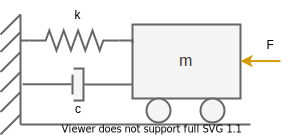

In [1]:
from IPython.display import SVG, display
display(SVG(filename='spring_mass_damper.svg'))

Knowing its differential equation:
$$m\ddot{x}(t) + c\dot{x}(t) + kx(t) = F(t)$$
We find transfer function as $G(s)=\frac{X(s)}{U(s)}$, where $X(s)=\mathcal{L}\{x(t)\}$ and $U(s)=\mathcal{L}\{u(t)\}$:
$$G(s) = \frac{1}{ms^2+bs+k}$$

In [2]:
import control
import numpy as np
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style()

m = 1.5
k = 0.4
b = 0.3

tf = control.TransferFunction([1], [m, b, k])
t, y = control.step_response(tf, np.arange(0, 50,0.1))
plt.plot(t, y)


#### Poles
We can analyze system's properties by solving it's *characteristic equation* - denumerator of the transfer function.

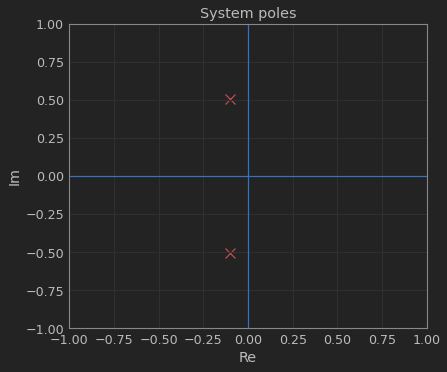

In [3]:

# Find system poles:
poles = control.pole(tf)
plt.scatter([poles[0].real, poles[1].real], [poles[0].imag, poles[1].imag], color = 'r', marker='x', s=100)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('System poles')
plt.axhline(0)
plt.axvline(0)

Example for few different parameters sets:

In [4]:
m_b_k_params = [[1.2, 0.6, 0.6], [3.2, 0.0, 0.6], [1.2, 1.9, 0.6]]

for mbk in m_b_k_params:
    tf = control.TransferFunction([1], mbk)
    t, y = control.impulse_response(tf, np.arange(0, 50,0.1))
    plt.plot(t, y, label=f'm={mbk[0]}, b={mbk[1]}, k={mbk[2]}')

plt.legend()
plt.title('Step response')

Text(0.5, 1.0, 'Step response')

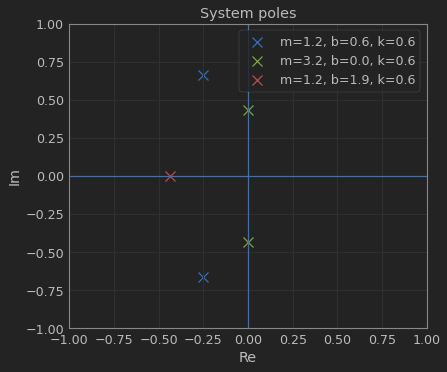

In [5]:
plt.axhline(0)
plt.axvline(0)
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.xlabel('Re')
plt.ylabel('Im')
plt.title('System poles')

for mbk in m_b_k_params:
    tf = control.TransferFunction([1], mbk)
    poles = control.pole(tf)
    plt.scatter([poles[0].real, poles[1].real], 
                [poles[0].imag, poles[1].imag], 
                marker='x', s=100, 
                label=f'm={mbk[0]}, b={mbk[1]}, k={mbk[2]}')
plt.legend()
    

Note that for a system without any damping (b=0.0) we have undamped oscillations and two poles on an imaginary axis. Note that for real part of the Laplace transform equal 0, the transform is reduced to Furier transform. Since Furier transform of this system can be described as two symmetric infinite spikes, it describes a sine function.

### Impulse response
Let's find an *impulse response* of the system.

As a reminder, impulse response is a system's response to a **Dirac delta** input.
$$\delta(t)=    \begin{cases}
      \infty & \text{for } t=0\\
      0 & \text{otherwise}
    \end{cases}    $$

And:

$$\int_{-\infty}^{\infty}\delta(t)dt = 1$$

Impulse response can be calculated as:
$$y_a(t) = \mathcal{L}^{-1}[G(s)\cdot1] = \mathcal{L}^{-1}[G(s)]=g(t)$$

---
**NOTE**

Note consequences of this equation - knowing impulse response of a (continuous, one-dimention, linear, time-invariant ("stationary")) system means that we "know" the system.

(If we can't register the impulse response, we can register a step response and then calculate it's derivative)

---


Let's find impusle response of a system with following params:

$m = 1\text{, } b = 2\text{, } k = 5$

$$g(t)=\mathcal{L}^{-1}\{G(s)\}$$
$$g(t)=\mathcal{L}^{-1}[0.5\frac{2}{(s+1)^2+2^2}]$$

From the transform tables:

| $f(t)$| $F(s)$ |
| ----------------------|----------------------------- |
|$f(t)=e^{at}sin(bt)$   | $F(s)=\frac{b}{(s-a)^2+b^2}$ | 

thus:

$$g(t)=0.5e^{-t}sin(2t)$$

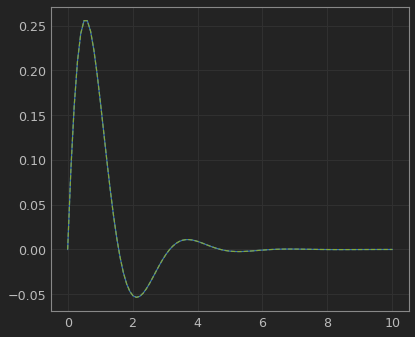

In [6]:
from math import exp, sin, cos
import numpy as np
import matplotlib.pyplot as plt

def impulse_response(t):
    return 0.5*(exp(-t) * sin(2*t))

t = np.linspace(0., 10., 100).tolist()
y = [impulse_response(tt) for tt in t]
plt.plot(t, y)

# to be sure let's compare with python control library:
tf = control.TransferFunction([1], [1,2,5])
tt, yy = control.impulse_response(tf, t)
plt.plot(tt, yy, linestyle = '--')

### Arbitrary response
An arbitraty input $u(t)$ can be defined as a sum of weighted and time-delayed Dirac deltas.
$$u(t)=\int_0^{t}u(\tau)\delta(t-\tau)d\tau$$

Response of a continuous time-invariant linear system can be interpreted as a sum of weighted and time-delayed input responses.
$$y(t)=\int_0^t g(t-\tau)u(\tau)d\tau$$

Note that according to this equation, system's response to an arbitraty input can be calculated as a **convolution of a system's unit response and arbitrary input**.

In this context it is particularly convenient, that **Laplace transforms converts convolution to multiplication**. Thus, a Laplace transform of a system's response to given input is system's **transfer function multiplied by a Laplace transform of this input**.

#### Digression: convolution reverb in audio production
Paricularly interesting application of this property can be found in audio production, where convolution is used to replicate "room response" of given sound.

In order to replicate unique effect of playing sound e.g. in a concert hall or a large church, one can register impulse response of the area by recording e.g. sound of gunshot in this place.

Then, the convolution of arbitraty sound (e.g. song) with recorded response will result in a close approximation how this song sould sound in said area.

A nice explanation of this method with examples can be found here:
https://cmtext.indiana.edu/synthesis/chapter4_convolution.php

Note that typically to achieve real-time performance of these filters, convolution is performed using efficient algorithms in frequency domain (FFT etc.).

#### Step response
With this knowledge, let's find a step response of our system:
$$g(t) = \mathcal{L}^{-1}[G(s)*U(s)]$$
$$g(t) = \mathcal{L}^{-1}[\frac{1}{s^2+2s+5}\cdot \frac{1}{s}]$$
$$g(t) = ... $$
$$g(t) = \frac{1}{5}[1-(e^{-t}(cos(2t)+0.5sin(2t)))]$$

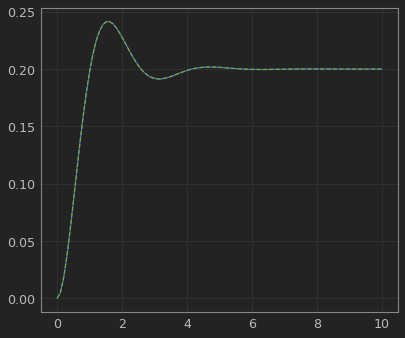

In [7]:
from math import exp, sin, cos
import numpy as np
import matplotlib.pyplot as plt

def step_response(t):
    return 0.2*(1-(exp(-t) * (cos(2*t) + 0.5*sin(2*t))))

t = np.linspace(0., 10., 100).tolist()
y = [step_response(tt) for tt in t]
plt.plot(t, y)

# to be sure let's compare with python control library:
tf = control.TransferFunction([1], [1,2,5])
tt, yy = control.step_response(tf, t)
plt.plot(tt, yy, linestyle = '--')